<a href="https://colab.research.google.com/github/namoshi/mathAI/blob/master/py_stat_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import statistics
import matplotlib.pyplot as plt

# 学生の身長のデータ


|  学生 |   1 |   2 |   3 |   4 |   5 |   6 |   7 |   8 |   9 |  10 |  11 |  12 |  13 |  14 |  15 | <br>
|  身長 | 178 | 165 | 168 | 152 | 175 | 175 | 165 | 162 | 164 | 170 | 169 | 155 | 153 | 162 | 168 |



In [3]:
# 学生の身長のデータ
heights = np.array([178, 165, 168, 152, 175, 175, 165, 162, 164, 170, 169, 155, 153, 162, 168], dtype=float)

print(len(heights))
print(heights)

15
[178. 165. 168. 152. 175. 175. 165. 162. 164. 170. 169. 155. 153. 162.
 168.]


## ヒストグラム

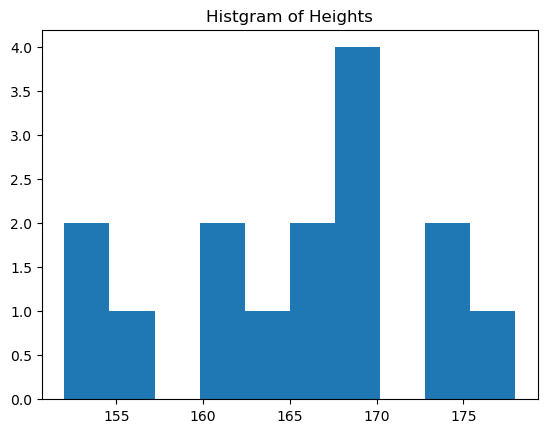

In [4]:
plt.title('Histgram of Heights')
plt.hist(heights)
plt.savefig('height_hist.png')
plt.show()


## 代表値（平均，メディアン，四分位点，モード）

In [ ]:
# 平均

# 定義通りに計算
print('Mean=', np.sum(heights)/len(heights))

# ベクトル表現
print('Mean=', np.dot(heights, np.ones(len(heights)))/len(heights))

# Python package (statistics) を利用
mean_heights = statistics.mean(heights)
print('Mean=', mean_heights)


Mean= 165.4
Mean= 165.4
Mean= 165.4


In [ ]:
# メディアン

# 定義通りに計算
sorted_heights = np.sort(heights)
print(sorted_heights)

m = len(sorted_heights) // 2
print(m)

if len(sorted_heights) % 2 == 0:
    median_heights = (sorted_heights[m] + sorted_heights[m+1]) / 2.0
else:
    median_heights = sorted_heights[m]

print('median=', median_heights)

# Python package (statistics) を利用
median_heights = statistics.median(sorted_heights)
print('median=', median_heights)


[152. 153. 155. 162. 162. 164. 165. 165. 168. 168. 169. 170. 175. 175.
 178.]
7
median= 165.0
median= 165.0


In [ ]:
# パーセンタイル，モードの計算

print('Quantiles:', statistics.quantiles(heights))

print('mode=', statistics.mode(heights))

Quantiles: [162.0, 165.0, 170.0]
mode= 165.0


## 分散と標準偏差

In [ ]:
# 分散と標準偏差

Var = statistics.variance(heights)
print('Varaicne=', Var)

SD = statistics.stdev(heights)
print('Standard Deviation=', SD)


Varaicne= 61.25714285714286
Standard Deviation= 7.826694248349226


In [ ]:
# データの標準化と偏差値

math_scores = np.array([82, 43, 56, 77, 96, 35, 68, 91, 55, 85], dtype=float)

math_mean = statistics.mean(math_scores)
print('Mean=', math_mean)

math_sd = statistics.stdev(math_scores)
print('SD=', math_sd)

# 標準化
math_z = (math_scores - math_mean) / math_sd
print('Standarlized Scores\n', math_z)

# 偏差値
x = 90.0
y = 10.0 * (x - math_mean) / math_sd + 50.0
print('T-score of %f = %f' % (x, y))


Mean= 68.8
SD= 20.815592446262222
Standarlized Scores
 [ 0.63414001 -1.23945547 -0.61492365  0.39393546  1.30671275 -1.62378275
 -0.03843273  1.0665082  -0.66296456  0.77826274]
T-score of 90.000000 = 60.184673


## 散布図

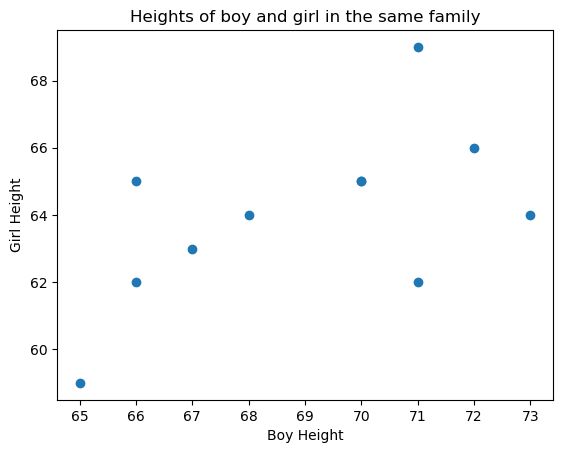

In [5]:
# 家族の身長のデータ
boys_height = np.array([71, 68, 66, 67, 70, 71, 70, 73, 72, 65, 66], dtype=float)
girls_height = np.array([69, 64, 65, 63, 65, 62, 65, 64, 66, 59, 62], dtype=float)

plt.title('Heights of boy and girl in the same family')
plt.scatter(boys_height, girls_height)
plt.xlabel('Boy Height')
plt.ylabel('Girl Height')
plt.savefig('family_height.png')
plt.show()


## 共分散と相関係数

In [ ]:
# それそれの平均
boys_mean = statistics.mean(boys_height)
girls_mean = statistics.mean(girls_height)
print('Boys mean=', boys_mean, 'Girls mean=', girls_mean)

boys_var = statistics.variance(boys_height)
girls_var = statistics.variance(girls_height)
print('Boys variance=', boys_var, 'Girls variance=', girls_var)

coval = statistics.covariance(boys_height, girls_height)
print('Covariance=', coval)

corr = statistics.correlation(boys_height, girls_height)
print('Correlation=', corr)

Boys mean= 69.0 Girls mean= 64.0
Boys variance= 7.4 Girls variance= 6.6
Covariance= 3.9
Correlation= 0.5580547118563389


## 分散共分散行列

\begin{align*}
  \Sigma = \frac{1}{n} \sum_{i=1}^n (\bf{x}_i - \bar{\bf{x}}) (\bf{x}_i - \bar{\bf{x}})^T
\end{align*}

In [ ]:
# concatenate boys_height and girls_height

X = np.concatenate((boys_height, girls_height), axis=0).reshape((2, 11))

print('X\n', X.T)

Sigma = np.cov(X)

print('Covariance Matrix\n', Sigma)

X
 [[71. 69.]
 [68. 64.]
 [66. 65.]
 [67. 63.]
 [70. 65.]
 [71. 62.]
 [70. 65.]
 [73. 64.]
 [72. 66.]
 [65. 59.]
 [66. 62.]]
Covariance Matrix
 [[7.4 3.9]
 [3.9 6.6]]


## 確率計算の例

問題：

$2$個のサイコロを同時に$24$回投げるとき，$A$を$(6,6)$の目が少なくとも$1$回出る事象とし，$B$を$(6,6)$の目が$1$回も出ない事象とする．$P(A)$および$P(B)$を求めよ．



In [2]:
PB = np.power(35.0/36.0, 24)
print('P(A)=', 1.0 - PB)
print('P(B)=', PB)


P(A)= 0.4914038761309034
P(B)= 0.5085961238690966


## 歪度(Skewness)と劣度(kurtosis)

In [9]:
from scipy.stats import skew

data1 = np.array([1, 2, 3, 4, 5])

print('skewness (data1) =', skew(data1))

data2 = np.array([2, 8, 0, 4, 1, 9, 9, 0])

print('skewness (data2) =', skew(data2))

skewness (data1) = 0.0
skewness (data2) = 0.2650554122698573


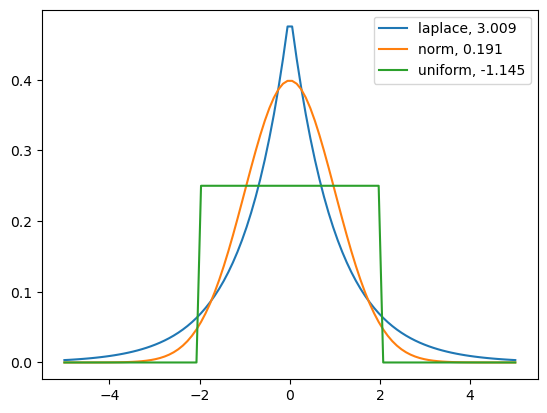

In [6]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import kurtosis


x = np.linspace(-5, 5, 100)
ax = plt.subplot()
distnames = ['laplace', 'norm', 'uniform']

for distname in distnames:
    if distname == 'uniform':
        dist = getattr(stats, distname)(loc=-2, scale=4)
    else:
        dist = getattr(stats, distname)
    data = dist.rvs(size=1000)
    kur = kurtosis(data, fisher=True)
    y = dist.pdf(x)
    ax.plot(x, y, label="{}, {}".format(distname, round(kur, 3)))
    ax.legend()


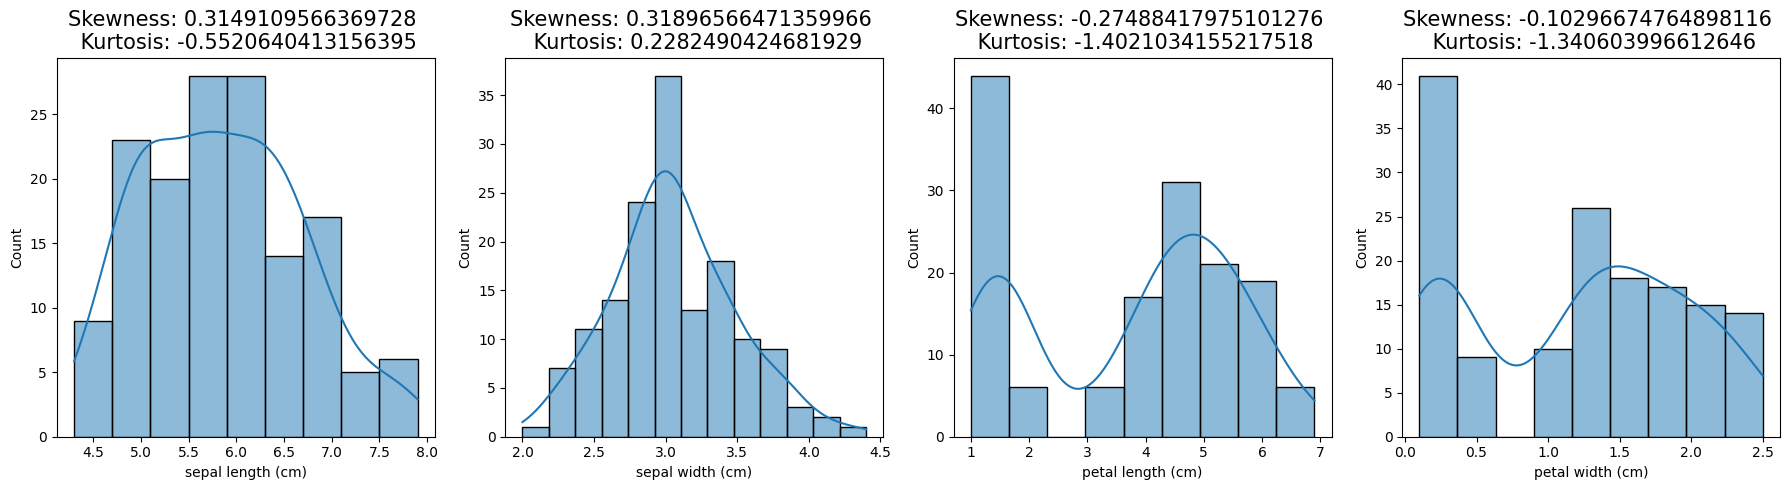

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris


iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# 描画準備
col = len(data.columns)
_, axes =  plt.subplots(1, col, figsize=(18, 5))

for i, var in enumerate(data.columns):
  sns.histplot(x=var, data=data, ax=axes[i], kde=True)
  axes[i].set_title('Skewness: {} \n Kurtosis: {}'.format(data[var].skew(), data[var].kurt()), fontsize=15)

plt.tight_layout()
plt.show()


## ベルヌーイ分布



In [17]:
import numpy as np
from scipy.stats import bernoulli

p = 0.3
print('p=', p)
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')
print('Mean=', mean, ' Var=', var, 'Skey=', skew, 'Kurt=', kurt)

p = 0.5
print('p=', p)
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')
print('Mean=', mean, ' Var=', var, 'Skey=', skew, 'Kurt=', kurt)


p= 0.3
Mean= 0.3  Var= 0.21 Skey= 0.8728715609439694 Kurt= -1.2380952380952381
p= 0.5
Mean= 0.5  Var= 0.25 Skey= 0.0 Kurt= -2.0


## 二項分布（Binomial Distribution）

n= 50 p= 0.4
Mean= 20.0  Var= 12.0 Skey= 0.05773502691896257 Kurt= -0.03666666666666668
n= 100 p= 0.4
Mean= 40.0  Var= 24.0 Skey= 0.0408248290463863 Kurt= -0.01833333333333334
n= 100 p= 0.6
Mean= 60.0  Var= 24.0 Skey= -0.0408248290463863 Kurt= -0.01833333333333333


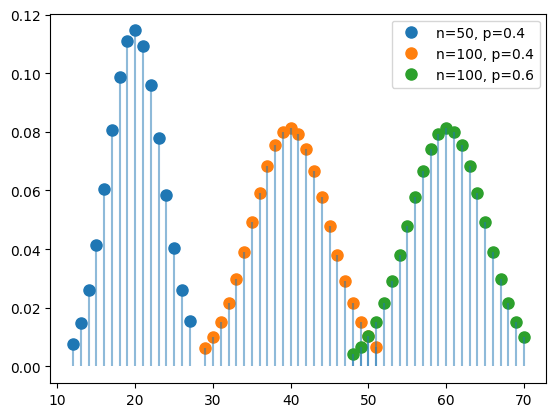

In [27]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

n, p = 50, 0.4
print('n=', n, 'p=', p)
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
print('Mean=', mean, ' Var=', var, 'Skey=', skew, 'Kurt=', kurt)

x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'o', ms=8, label='n={}, p={}'.format(n, p))
ax.vlines(x, 0, binom.pmf(x, n, p), alpha=0.5)

n, p = 100, 0.4
print('n=', n, 'p=', p)
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
print('Mean=', mean, ' Var=', var, 'Skey=', skew, 'Kurt=', kurt)

x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'o', ms=8, label='n={}, p={}'.format(n, p))
ax.vlines(x, 0, binom.pmf(x, n, p), alpha=0.5)

n, p = 100, 0.6
print('n=', n, 'p=', p)
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
print('Mean=', mean, ' Var=', var, 'Skey=', skew, 'Kurt=', kurt)

x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'o', ms=8, label='n={}, p={}'.format(n, p))
ax.vlines(x, 0, binom.pmf(x, n, p), alpha=0.5)

ax.legend()

plt.show()

## ポアソン分布 (Poisson Distribution)

mu= 0.5
Mean= 0.5  Var= 0.5 Skey= 1.4142135623730951 Kurt= 2.0
mu= 5
Mean= 5.0  Var= 5.0 Skey= 0.4472135954999579 Kurt= 0.2
mu= 10
Mean= 10.0  Var= 10.0 Skey= 0.31622776601683794 Kurt= 0.1


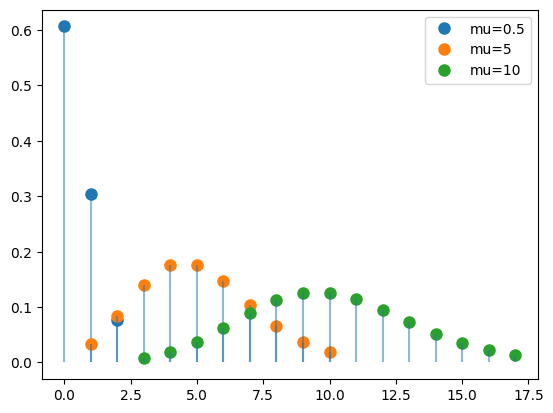

In [59]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

mu = 0.5
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
print('mu=', mu)
print('Mean=', mean, ' Var=', var, 'Skey=', skew, 'Kurt=', kurt)

x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'o', ms=8, label='mu={}'.format(mu))
ax.vlines(x, 0, poisson.pmf(x, mu), alpha=0.5)

mu = 5
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
print('mu=', mu)
print('Mean=', mean, ' Var=', var, 'Skey=', skew, 'Kurt=', kurt)

x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'o', ms=8, label='mu={}'.format(mu))
ax.vlines(x, 0, poisson.pmf(x, mu), alpha=0.5)

mu = 10
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
print('mu=', mu)
print('Mean=', mean, ' Var=', var, 'Skey=', skew, 'Kurt=', kurt)

x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'o', ms=8, label='mu={}'.format(mu))
ax.vlines(x, 0, poisson.pmf(x, mu), alpha=0.5)

ax.legend()

plt.show()

## 一様分布(Uniform Distribution)

Mean= 0.5  Var= 0.08333333333333333 Skey= 0.0 Kurt= -1.2


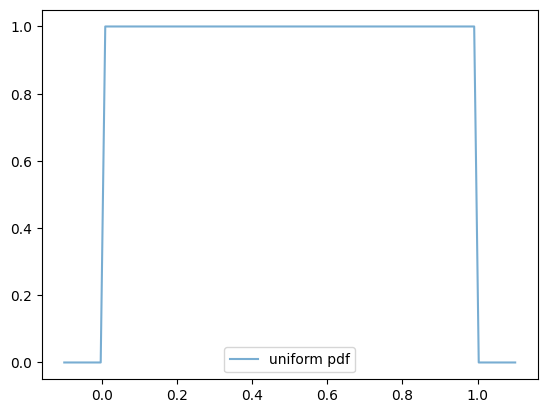

In [58]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

mean, var, skew, kurt = uniform.stats(moments='mvsk')
print('Mean=', mean, ' Var=', var, 'Skey=', skew, 'Kurt=', kurt)

x = np.linspace(-0.1, 1.1, 100)
ax.plot(x, uniform.pdf(x),
       '-', alpha=0.6, label='uniform pdf')

ax.legend()

plt.show()

## 指数分布(Exponential Distribution)



Mean= 1.0  Var= 1.0 Skey= 2.0 Kurt= 6.0
Mean= 2.0  Var= 4.0 Skey= 2.0 Kurt= 6.0
Mean= 0.5  Var= 0.25 Skey= 2.0 Kurt= 6.0


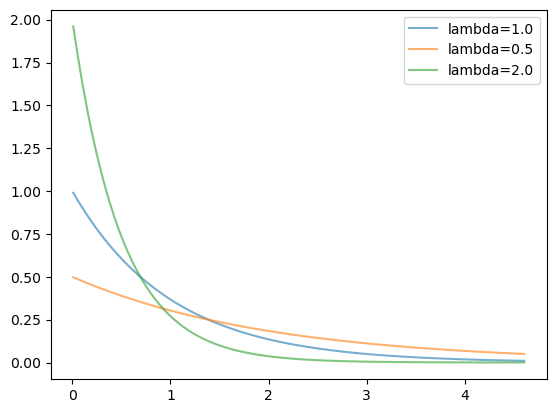

In [19]:
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

lam=1.0
mean, var, skew, kurt = expon(0.0, 1.0/lam).stats(moments='mvsk')
print('Mean=', mean, ' Var=', var, 'Skey=', skew, 'Kurt=', kurt)

x = np.linspace(expon.ppf(0.01),
                expon.ppf(0.99), 100)
ax.plot(x, expon.pdf(x, 0.0, 1.0/lam),
       '-', alpha=0.6, label='lambda={}'.format(lam))

lam=0.5
mean, var, skew, kurt = expon(0.0, 1.0/lam).stats(moments='mvsk')
print('Mean=', mean, ' Var=', var, 'Skey=', skew, 'Kurt=', kurt)

ax.plot(x, expon.pdf(x, 0.0, 1.0/lam),
       '-', alpha=0.6, label='lambda={}'.format(lam))

lam=2.0
mean, var, skew, kurt = expon(0.0, 1.0/lam).stats(moments='mvsk')
print('Mean=', mean, ' Var=', var, 'Skey=', skew, 'Kurt=', kurt)

ax.plot(x, expon.pdf(x, 0.0, 1.0/lam),
       '-', alpha=0.6, label='lambda={}'.format(lam))

ax.legend()

plt.show()

## 正規分布(Normal Distribution)

Mean= 0.0  Var= 1.0 Skey= 0.0 Kurt= 0.0
Mean= 1.0  Var= 1.0 Skey= 0.0 Kurt= 0.0
Mean= 0.0  Var= 0.25 Skey= 0.0 Kurt= 0.0
Mean= 0.0  Var= 4.0 Skey= 0.0 Kurt= 0.0


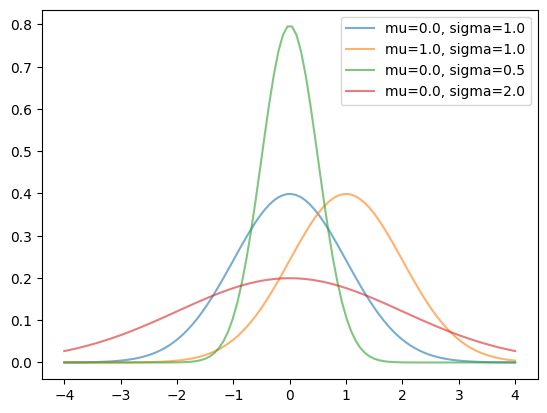

In [56]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

mu=0.0
sigma=1.0
mean, var, skew, kurt = norm(mu, sigma).stats(moments='mvsk')
print('Mean=', mean, ' Var=', var, 'Skey=', skew, 'Kurt=', kurt)

x = np.linspace(-4.0, 4.0, 100)
ax.plot(x, norm.pdf(x, mu, sigma),
       '-', alpha=0.6, label='mu={}, sigma={}'.format(mu, sigma))

mu=1.0
sigma=1.0
mean, var, skew, kurt = norm(mu, sigma).stats(moments='mvsk')
print('Mean=', mean, ' Var=', var, 'Skey=', skew, 'Kurt=', kurt)

ax.plot(x, norm.pdf(x, mu, sigma),
       '-', alpha=0.6, label='mu={}, sigma={}'.format(mu, sigma))

mu=0.0
sigma=0.5
mean, var, skew, kurt = norm(mu, sigma).stats(moments='mvsk')
print('Mean=', mean, ' Var=', var, 'Skey=', skew, 'Kurt=', kurt)

ax.plot(x, norm.pdf(x, mu, sigma),
       '-', alpha=0.6, label='mu={}, sigma={}'.format(mu, sigma))

mu=0.0
sigma=2.0
mean, var, skew, kurt = norm(mu, sigma).stats(moments='mvsk')
print('Mean=', mean, ' Var=', var, 'Skey=', skew, 'Kurt=', kurt)

ax.plot(x, norm.pdf(x, mu, sigma),
       '-', alpha=0.6, label='mu={}, sigma={}'.format(mu, sigma))

ax.legend()

plt.show()